In [1]:
import geopandas as gpd

In [9]:
CCED = gpd.read_file('../../data/CCED/CCED_California_Conservation_Easement_Database.shp')

In [10]:
type(CCED)

geopandas.geodataframe.GeoDataFrame

In [11]:
CCED.head()

,ease_label,sitename,esmthldr,eholdtyp,pubaccess,duration,comments,projectid,dtmboardap,county,...,s_emthd1,ShapeSTLen,OBJECTID,e_type,Shape_Leng,OBJECTID_1,Shape_Le_1,GlobalID,OBJECTID_2,geometry
0,Conservation Easement,Forest Service Easement,United States Forest Service,Federal,Closed,Permanent,None,None,None,San Diego,...,None,13904.975825,1,None,11677.376353,1,11677.376353,{47F27121-F8E0-464A-8460-257E4815EC72},1,MULTIPOLYGON Z (((-12986180.651 3863101.889 0....
1,Conservation Easement,Forest Service Easement,United States Forest Service,Federal,Closed,Permanent,None,None,None,San Diego,...,None,4682.317029,2,None,3906.326855,2,3906.326855,{4A76CAED-7EFA-4B3D-B60F-25077C8132F9},2,"POLYGON Z ((-13004703.942 3936729.412 0.000, -..."
2,Conservation Easement,Forest Service Easement,United States Forest Service,Federal,Closed,Permanent,None,None,None,Riverside,...,None,2862.369888,3,None,2381.546995,3,2381.546995,{4C17BE5C-00CE-456F-8CF0-259211A8DBA7},3,"POLYGON Z ((-12985843.064 3982453.578 0.000, -..."
3,Conservation Easement,Forest Service Easement,United States Forest Service,Federal,Closed,Permanent,None,None,None,San Bernardino,...,None,1702.694201,4,None,1406.940351,4,1406.940351,{A48635D1-6A10-419B-B5A2-12F0355E8EC5},4,"POLYGON Z ((-13046839.601 4059743.122 0.000, -..."
4,Conservation Easement,Forest Service Easement,United States Forest Service,Federal,Closed,Permanent,None,None,None,El Dorado,...,None,355.721294,5,None,276.692317,5,276.692317,{52689BFB-BBCA-4E4C-A224-6A334B158035},5,MULTIPOLYGON Z (((-13359781.503 4702478.829 0....


Comments, projectid, and dtmboardap can most likely be eliminated. I wonder if we can also eliminate the ease_label column because it seems to all say Conservation Easement.

In [12]:
CCED.tail()

,ease_label,sitename,esmthldr,eholdtyp,pubaccess,duration,comments,projectid,dtmboardap,county,...,s_emthd1,ShapeSTLen,OBJECTID,e_type,Shape_Leng,OBJECTID_1,Shape_Le_1,GlobalID,OBJECTID_2,geometry
12292,Conservation Easement,Jacobsen Ranches,Sonoma County Agricultural Preservation and Op...,Special District,Closed,Unknown,None,None,None,Sonoma,...,None,3715.891560,0,Agricultural Easement,0.000000,12304,2916.724267,{27E3BEC5-A835-44A2-BAAF-0BFD9F050FF0},12293,"POLYGON Z ((-13656235.926 4611577.013 0.000, -..."
12293,Conservation Easement,Ten Mile River,The Nature Conservancy,NonProfit,Closed,Unknown,None,None,None,Mendocino,...,The Conservation Fund - California,12463.542161,2648,None,9603.545529,12313,9603.545528,{AC235E38-E3D7-4E40-9199-5AF9E1BDE890},12294,"POLYGON Z ((-13774767.297 4800714.734 0.000, -..."
12294,Conservation Easement,TNC Easement,The Nature Conservancy,NonProfit,Closed,Unknown,None,None,None,Mendocino,...,None,25175.877213,2776,None,19392.853222,12314,19392.853222,{B800A504-CCC6-4FE8-9447-52CDB15B8048},12295,"POLYGON Z ((-13772053.708 4806425.419 0.000, -..."
12295,Conservation Easement,Ten Mile River,The Conservation Fund - California,NonProfit,Closed,Unknown,None,None,None,Mendocino,...,None,2796.149142,3528,None,2154.428836,12315,2154.428836,{9F878329-6596-4168-8518-9BA33DE50F31},12296,"POLYGON Z ((-13773137.106 4801162.076 0.000, -..."
12296,Conservation Easement,Ten Mile River,The Conservation Fund - California,NonProfit,Closed,Unknown,None,None,None,Mendocino,...,None,1501.762544,3531,None,1157.857449,12316,1157.857449,{7541C12A-14E0-4CD7-9C44-76D97B925451},12297,"POLYGON Z ((-13773133.215 4800380.824 0.000, -..."


Interesting that entry 12292 shows that it is an agricultural easement in the e_type column. None of the other ones have said that so far, which points to why we need the research on what kind of lands the easements contain.

In [13]:
CCED.sample(10)

,ease_label,sitename,esmthldr,eholdtyp,pubaccess,duration,comments,projectid,dtmboardap,county,...,s_emthd1,ShapeSTLen,OBJECTID,e_type,Shape_Leng,OBJECTID_1,Shape_Le_1,GlobalID,OBJECTID_2,geometry
4781,Conservation Easement,Seabright Carlsbad Homeowners Association Ease...,Seabright Carlsbad Homeowners Association,Private,Closed,Unknown,None,None,None,San Diego,...,None,1544.769982,4896,None,1290.475129,4792,1290.475129,{226DBF56-3E7D-4337-B73F-96D940732505},4782,"POLYGON Z ((-13058468.786 3911345.835 0.000, -..."
11565,Conservation Easement,Lockheed Potrero Conservation Easement,Western Riverside County Regional Conservation...,County,Closed,Unknown,None,None,None,Riverside,...,None,1794.501697,11681,None,1491.477155,11576,1491.477155,{CDD14241-C5B2-4E87-9D62-8BF91AD40EFB},11566,"POLYGON Z ((-13016659.678 4009467.140 0.000, -..."
12073,Conservation Easement,US-CA-147-12,"Ducks Unlimited, Inc",NonProfit,Closed,Unknown,None,None,None,Sutter,...,None,6152.416746,12193,None,4774.510265,12084,4774.510265,{A08E102F-0F24-4A9C-A2C1-AB6008E3E290},12074,"POLYGON Z ((-13549545.269 4732593.249 0.000, -..."
759,Conservation Easement,Conservation Easement,Land Conservancy of San Luis Obispo County,NonProfit,Closed,Unknown,None,None,None,San Luis Obispo,...,None,1223.939974,783,None,999.724635,762,999.724635,{A0476A1D-CCA8-4554-941D-2F7FF15EA9E6},760,"POLYGON Z ((-13439900.383 4188711.384 0.000, -..."
5226,Conservation Easement,Roger Hertel,"Unknown, SANDAG reported",Private,Closed,Unknown,None,None,None,San Diego,...,None,654.000700,5341,None,550.247745,5237,550.247745,{072EAE8B-C4AF-4278-83B7-F0400724CC52},5227,"POLYGON Z ((-13002842.673 3856777.764 0.000, -..."
10747,Conservation Easement,Unknown or Unnamed,"Unknown, SanGIS reported",Association,Closed,Unknown,None,None,None,San Diego,...,None,196.561189,10863,None,164.915819,10758,164.915819,{7E2E4F85-C059-4839-8C8A-ACE3E56B56CD},10748,"POLYGON Z ((-13021516.366 3847527.818 0.000, -..."
1174,Conservation Easement,County of Santa Cruz Easement,"Santa Cruz, County of",County,Closed,Unknown,060-011-02,None,None,Santa Cruz,...,None,2342.956099,1198,None,1868.723637,1177,1868.723637,{CC139715-2801-4300-825B-F75273D8AD70},1175,"POLYGON Z ((-13584558.813 4440740.426 0.000, -..."
10496,Conservation Easement,Unknown or Unnamed,"Unknown, SanGIS reported",Association,Closed,Unknown,None,None,None,San Diego,...,None,60.897343,10612,None,50.962425,10507,50.962425,{65BE1DAE-AD92-444A-87B2-29C2F4324D65},10497,"POLYGON Z ((-13044761.913 3908066.089 0.000, -..."
8905,Conservation Easement,Unknown or Unnamed,"Unknown, SanGIS reported",Private,Closed,Unknown,None,None,None,San Diego,...,None,246.478665,9020,None,206.394665,8916,206.394665,{93C127F8-7C41-476F-9AEC-854402569051},8906,"POLYGON Z ((-13007178.114 3905940.147 0.000, -..."
9141,Conservation Easement,Unknown or Unnamed,"Unknown, SanGIS reported",Unknown,Closed,Unknown,None,None,None,San Diego,...,None,107.734396,9256,None,90.048388,9152,90.048388,{0A6041DF-C5FB-48A3-AF71-BA71BFEE1319},9142,"POLYGON Z ((-13058691.719 3912617.860 0.000, -..."


Some of the entries have unknown as who the easementholder is and the easementholder type. Duration for all of these is also unknown, perhaps the ones that are known to be "permanent" are in the minority. 

In [14]:
CCED.dtypes

ease_label      object
sitename        object
esmthldr        object
eholdtyp        object
pubaccess       object
duration        object
comments        object
projectid       object
dtmboardap      object
county          object
src_align       object
src_attr        object
cced_id          int64
gis_acres      float64
year_est         int64
term             int64
dataentry       object
nced_uid        object
s_emthd1        object
ShapeSTLen     float64
OBJECTID         int64
e_type          object
Shape_Leng     float64
OBJECTID_1       int64
Shape_Le_1     float64
GlobalID        object
OBJECTID_2       int64
geometry      geometry
dtype: object

The majority of the data are object. There are some int64 and float64 (more int64).

In [15]:
CCED.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 12297 entries, 0 to 12296
Data columns (total 28 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   ease_label  12297 non-null  object  
 1   sitename    12297 non-null  object  
 2   esmthldr    12297 non-null  object  
 3   eholdtyp    12297 non-null  object  
 4   pubaccess   12297 non-null  object  
 5   duration    12274 non-null  object  
 6   comments    1201 non-null   object  
 7   projectid   120 non-null    object  
 8   dtmboardap  201 non-null    object  
 9   county      12297 non-null  object  
 10  src_align   12297 non-null  object  
 11  src_attr    12235 non-null  object  
 12  cced_id     12297 non-null  int64   
 13  gis_acres   12297 non-null  float64 
 14  year_est    12297 non-null  int64   
 15  term        12297 non-null  int64   
 16  dataentry   2792 non-null   object  
 17  nced_uid    11319 non-null  object  
 18  s_emthd1    100 non-null    object  
 

The columns comments, project id, dtmboardap, dataentry, nced_uid, s_emthd1, and e_type have a lot of missing values. Duration and src_attr have some missing data. The rest are complete.

In [16]:
CCED.shape

(12297, 28)

In [17]:
CCED.columns.to_list()

['ease_label',
 'sitename',
 'esmthldr',
 'eholdtyp',
 'pubaccess',
 'duration',
 'comments',
 'projectid',
 'dtmboardap',
 'county',
 'src_align',
 'src_attr',
 'cced_id',
 'gis_acres',
 'year_est',
 'term',
 'dataentry',
 'nced_uid',
 's_emthd1',
 'ShapeSTLen',
 'OBJECTID',
 'e_type',
 'Shape_Leng',
 'OBJECTID_1',
 'Shape_Le_1',
 'GlobalID',
 'OBJECTID_2',
 'geometry']

In [18]:
CCED['esmthldr']

0                             United States Forest Service
1                             United States Forest Service
2                             United States Forest Service
3                             United States Forest Service
4                             United States Forest Service
                               ...                        
12292    Sonoma County Agricultural Preservation and Op...
12293                               The Nature Conservancy
12294                               The Nature Conservancy
12295                   The Conservation Fund - California
12296                   The Conservation Fund - California
Name: esmthldr, Length: 12297, dtype: object

In [19]:
CCED['esmthldr'].value_counts()

Unknown, SanGIS reported                                5523
Unknown, SANDAG reported                                 830
United States Fish and Wildlife Service                  410
Truckee Donner Land Trust                                390
San Diego - Parks and Recreation Department, City of     361
                                                        ... 
Solano, County of                                          1
Marea at Aviara Homeowners Association                     1
El Centro, City of                                         1
San Diego - Environmental Services, City of                1
Telescope Point Homeowners Association                     1
Name: esmthldr, Length: 230, dtype: int64

It looks like there will be a ton of individual entries for esmthldr. Would be more helpful to use eholdtyp because they will be agglomerated a little bit (hopefully)

In [21]:
CCED['eholdtyp']

0                 Federal
1                 Federal
2                 Federal
3                 Federal
4                 Federal
               ...       
12292    Special District
12293           NonProfit
12294           NonProfit
12295           NonProfit
12296           NonProfit
Name: eholdtyp, Length: 12297, dtype: object

In [23]:
CCED['eholdtyp'].value_counts()

Unknown             2617
NonProfit           2543
Private             2425
Association         1492
Federal              835
Special District     667
State                634
City                 580
County               419
Government            73
JPA                   12
Name: eholdtyp, dtype: int64

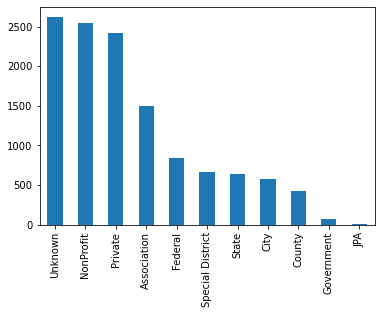

In [24]:
CCED['eholdtyp'].value_counts().plot.bar()

It looks like there is the highest numer of "unknown" easement holder type. 

In [28]:
CCED_trimmed = CCED[['esmthldr','eholdtyp','county','e_type','gis_acres']]
CCED_trimmed

,esmthldr,eholdtyp,county,e_type,gis_acres
0,United States Forest Service,Federal,San Diego,None,479.275130
1,United States Forest Service,Federal,San Diego,None,212.572028
2,United States Forest Service,Federal,Riverside,None,78.358309
3,United States Forest Service,Federal,San Bernardino,None,23.335541
4,United States Forest Service,Federal,El Dorado,None,0.524050
...,...,...,...,...,...
12292,Sonoma County Agricultural Preservation and Op...,Special District,Sonoma,Agricultural Easement,125.251993
12293,The Nature Conservancy,NonProfit,Mendocino,None,856.231628
12294,The Nature Conservancy,NonProfit,Mendocino,None,2448.907514
12295,The Conservation Fund - California,NonProfit,Mendocino,None,20.603200


Make a trimmed one for easier viewing right now. for actual analysis of course will keep in the geometry

Curious about the Nature Conservancy's easements

In [29]:
CCED_trimmed.query("esmthldr == 'The Nature Conservancy'")

,esmthldr,eholdtyp,county,e_type,gis_acres
2166,The Nature Conservancy,NonProfit,Merced,None,1804.406281
2167,The Nature Conservancy,NonProfit,Merced,None,309.875914
2526,The Nature Conservancy,NonProfit,Butte,None,2980.276907
2527,The Nature Conservancy,NonProfit,San Diego,None,177.495210
2528,The Nature Conservancy,NonProfit,Merced,None,5819.057485
...,...,...,...,...,...
2688,The Nature Conservancy,NonProfit,Ventura,None,194.784946
2689,The Nature Conservancy,NonProfit,Ventura,None,39.890315
4243,The Nature Conservancy,NonProfit,San Diego,None,37.067076
12293,The Nature Conservancy,NonProfit,Mendocino,None,856.231628


Curious about by county

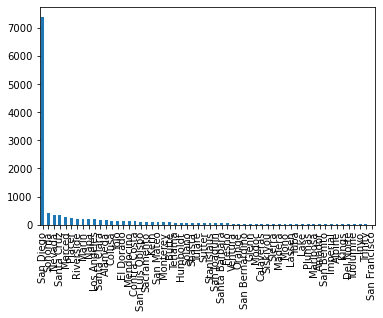

In [30]:
CCED_trimmed['county'].value_counts().plot.bar()

Wow it looks like San Diego County has the most easements by far. Or perhaps the data for other counties is missing? Let me check a different county.

In [31]:
CCED_trimmed.query("county == 'San Joaquin'")

,esmthldr,eholdtyp,county,e_type,gis_acres
973,California Farmland Trust,NonProfit,San Joaquin,None,908.992000
980,California Farmland Trust,NonProfit,San Joaquin,None,250.161118
983,California Farmland Trust,NonProfit,San Joaquin,None,174.187714
984,California Farmland Trust,NonProfit,San Joaquin,None,206.636303
985,California Farmland Trust,NonProfit,San Joaquin,None,244.031523
989,California Farmland Trust,NonProfit,San Joaquin,None,155.305963
991,California Farmland Trust,NonProfit,San Joaquin,None,155.984742
1418,California Department of Fish and Wildlife,State,San Joaquin,None,3063.922791
1436,California Department of Fish and Wildlife,State,San Joaquin,None,12.706802
1440,California Department of Fish and Wildlife,State,San Joaquin,None,24.708282
